# Regularyzacja w modelu regresji - wstęp

In [17]:
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from scipy import stats
from patsy import dmatrices

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures 

# Zadanie 1a

Wygeneruj $n$ par punktów (x, y) takich, że
$$
y = x - 2x^2 + 0.5x^3 + e,
$$
gdzie $e\sim\mathcal{N}(\mu, \sigma)$. 
A następnie dopasuj model

a) regresji liniowej: $y=\beta_0 + \beta_1\cdot x$

b) regresji wielomianowej stopnia 2: $y=\beta_0 + \beta_1\cdot x + \beta_2\cdot x^2$,

c) regresji wielomianowej stopnia 3: $y=\beta_0 + \beta_1\cdot x + \beta_2\cdot x^2 + \beta_3\cdot x^3$,

d) regresji wielomianowej stopnia 20: $y=\beta_0 + \beta_1\cdot x + \beta_2\cdot x^2 + \ldots + \beta_{20}\cdot x^{20}$.

Zaznacz na wykresie rozproszenia punktów $(x, y)$ funkcję regresji.

**Wskazówka**: `ols('y ~ x + I(x**k)', data_frame)` z `statsmodels.formula.api` lub `PolynomialFeatures` z `sklearn.preprocessing`

In [3]:
n = 50
x = stats.uniform.rvs(size=n, loc=-3, scale=6)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + stats.norm.rvs(size=n, loc=2, scale=2)

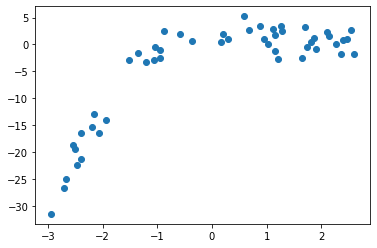

In [4]:
plt.scatter(x, y)

In [6]:
# a)
X = x.reshape(-1, 1)
model1 = LinearRegression(fit_intercept=True)
model1.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
model1_params = [model1.intercept_] + list(model1.coef_)
model1_params

[-4.636086867498542, 4.118900742321859]

In [11]:
print("Wspłczynnik determinacji R2: {}".format(model1.score(X, y)))
print("Współczynniki prostej regresji: {}".format(model1_params))

Wspłczynnik determinacji R2: 0.618002572884913
Współczynniki prostej regresji: [-4.636086867498542, 4.118900742321859]


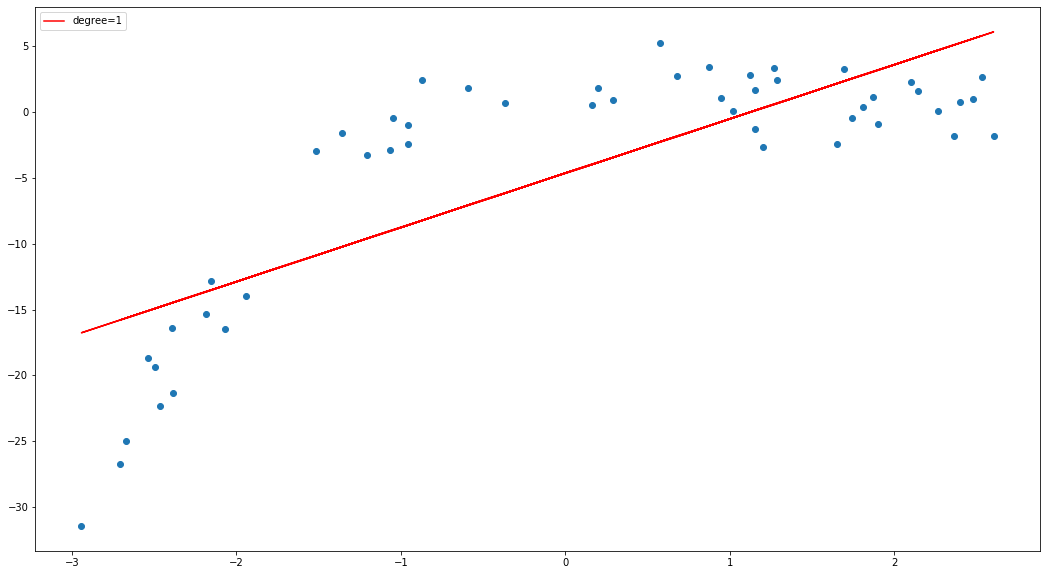

In [24]:
plt.figure(figsize=(18, 10))

plt.scatter(x, y)
plt.plot(x, x * model1_params[1] + model1_params[0], color='red', label="degree=1")
plt.legend(loc='upper left')
plt.show()

In [23]:
?plt.legend

In [25]:
# b) 

model2 = make_pipeline(
    PolynomialFeatures(degree=2),
    LinearRegression()
)

model2.fit(X, y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [27]:
model2_params = [model2['linearregression'].intercept_] + list(model2['linearregression'].coef_)
model2_params

[2.1938027956299164, 0.0, 3.5517874198965185, -2.152567525221587]

In [28]:
print("Wspłczynnik determinacji R2: {}".format(model2.score(X, y)))
print("Współczynniki prostej regresji: {}".format(model2_params))

Wspłczynnik determinacji R2: 0.9160084337594142
Współczynniki prostej regresji: [2.1938027956299164, 0.0, 3.5517874198965185, -2.152567525221587]


In [30]:
model2_fittedvalues = model2.predict(X) # y = b0 + b1 * x + b2 * x^2

In [31]:
import operator

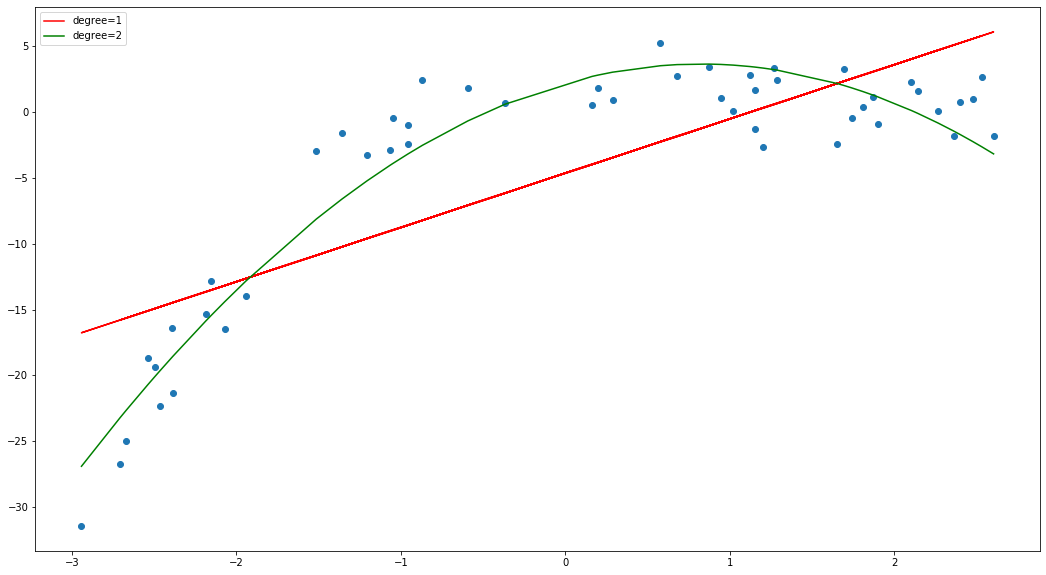

In [36]:
plt.figure(figsize=(18, 10))

plt.scatter(x, y)
plt.plot(x, x * model1_params[1] + model1_params[0], color='red', label="degree=1")
         
sorted_zip = sorted(zip(x, model2_fittedvalues), key=operator.itemgetter(0))
x_range, y_poly_pred = zip(*sorted_zip)

plt.plot(x_range, y_poly_pred, color='green', label='degree=2')
         
plt.legend(loc='upper left')
plt.show()

# Zadanie 1b

Dla wygenerowanej pary punktów dopasuj model regresji:

a) wielomianowej stopnia 20 z regularyzacją grzbietową (Ridge) z parametrem $\alpha = 0.1$,

b) wielomianowej stopnia 20 z regularyzacją Lasso z parametrem $\alpha = 0.1$.

Powtórz podpunkt a) i b) dla różnych wartości parametru $\alpha$, np. $\alpha \in \{0.001, 0.005, 0.01, 0.5, 1, 5\}$.

# Zadanie 2

Narysuj wykres funkcji 
$$y = cos(x) + \epsilon$$
dla $x \in [\pi, \frac{2}{3}\pi]$ oraz $\epsilon \in N(0, 0.25)$.

Dopasuj model regresji:
- liniowej
- wielomianej stopnia 2, 10 i 20,
- wielomianej stopnia 20 z regularyzacja Ridge z parametrem $\alpha\in\{0.001, 0.01, 0.1, 1, 2\}$.
- wielomianej stopnia 20 z regularyzacją Lasso z parametrem $\alpha\in\{0.001, 0.01, 0.1, 1, 2\}$.

**Wskazówka**: Napisz funkcję, która dla dowolnego zbioru dopasuje odpowiedni model.